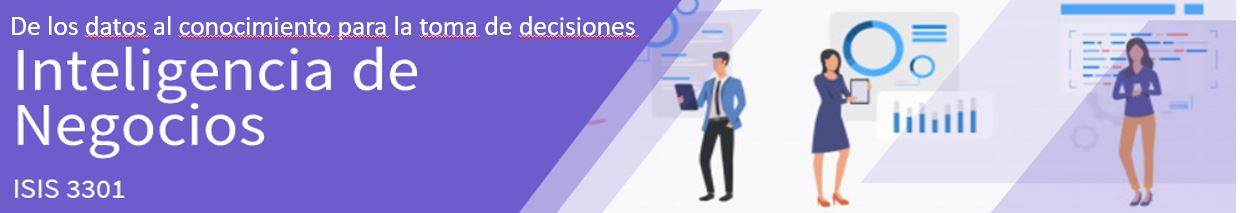

# Calidad de Datos
En este cuaderno revisaremos dos aspectos grandes de la calidad de datos:
* Carga:
  * Lectura de los Datos
  * Manipulación Básica
* Limpieza de Datos
  * Completitud
  * Duplicidad
  * Consistencia
  * Estandarización
* Perfilamiento de Datos
    * Visualización
    * Resumenes automáticos
    
Para la limpieza de los datos utilizaremos la libreria de **Pandas** (https://pandas.pydata.org/) y para la visualización de los datos, usaremos: **Seaborn**(https://seaborn.pydata.org/) y **Matplotlib** (https://matplotlib.org/). 

## Los Datos
Trabajaremos con una base de datos de canciones de Spotify. La base de datos original contiene alrededor de 600K canciones con diferentes caracteristicas musicales. Trabajaremos con una versión alterada de esta base de datos, ṕrecisamente para recalcar las técnicas que se quieren adquirir. 

La base de datos original, la pueden encontrar aquí: *https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks*

# Carga

## 1. Lectura

### 1.1 Librerias
En caso de no tener instaladas las librerias, recuerde que lo puede hacer desde la interfaz de Anaconda o directamente desde el cuaderno usando alguno de los siguientes comandos:

Si está usando Anaconda
```python
import sys
!conda install --yes --prefix {sys.prefix} pandas
```

Si está usando Pip
```python
import sys
!{sys.executable} -m pip install numpy
```

Si esta en GoogleColab
```python
!pip install numpy
```

In [1]:
# Librerias generales
# Pandas
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
# Ranom seed
import numpy as np
np.random.seed(3301)

# Seaborn
import seaborn as sns 

# Matplolib
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
# Ubicacion de la base de datos
db_location = "data/tracks.csv"

In [3]:
# Leer los datos
df_tracks = pd.read_csv(db_location)

In [4]:
# Dimensiones de los datos
df_tracks.shape

(568557, 20)

In [5]:
# Ver los datos
display(df_tracks.sample(5)) # Muestra de aleatoria de elementos
#display(df_tracks.head(5)) # Primeras Filas
#display(df_tracks.tail(5)) # Ultimas Filas

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,loudness,mode,decibel_range,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
284799,1V7GZM9LqCc0w7qn6blPwB,Mi Girisis,32.0,207707,0.0,"[""Haris & Panos Katsimihas""]",['2OVFX90h8lDzPZ5L5Mu0Vz'],2006-01-01,0.538,0.503,-7.514,m,NaN,0.0268,0.01980,0.000015,0.1470,0.081,131.895,4.0
120259,4akIaXZAJ9FIfhaLpWrUOk,Aunt Jane Blues,0.0,164093,0.0,"[""Brownie McGhee""]",['3qXzj7WzBV3kwy1yEV1RcC'],Year 1945,0.736,0.527,-5.301,m,NaN,0.1640,0.64800,0.000000,0.1390,0.898,83.606,4.0
133201,2Qxq1e5CsdBEPad0X7hvPu,"Slide, Mr. Trombone",0.0,195705,0.0,"[""Lucky Millinder""]",['4tdVYQWfsBth04tc1mmQ23'],Year 1941,0.492,0.360,-6.466,m,NaN,0.0345,0.96100,0.000000,0.0612,0.437,84.142,4.0
61545,0xt7T3rqNolRjO0AUWqBiD,Nuestro Amo Juega al Esclavo,51.0,239907,0.0,"[""Patricio Rey y sus Redonditos de Ricota""]",['6byQKddO1b34lXC2ZEjehQ'],1989-07-04,0.393,0.908,-6.856,m,NaN,0.0544,0.00174,0.001960,0.3430,0.362,118.408,4.0
257284,4b8LHm4wuLLOCEcdndKmOk,ferrari mindset,34.0,180207,0.0,"[""Samey"", ""Taomi""]","['0p0V7LW8i3S22J7xErqdmt', '59jeu94znh2noMuS99...",2019-09-01,0.819,0.651,-9.819,M,NaN,0.3570,0.18900,0.000006,0.0511,0.289,145.076,4.0


## 2. Manipulación Básica

In [6]:
# Imprimimos los diferentes tipos de las columnas
df_tracks.dtypes

id                   object
name                 object
popularity          float64
duration_ms           int64
explicit            float64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
loudness            float64
mode                 object
decibel_range       float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
dtype: object

Todos estos tipod de objectos vienen de la libreria de Numpy o *np* (Pandas la usa extensivamente). Asi que en realidad cuando dice *float64* se refiere a *np.float64*.

Los elementos de tipo String corresponden al tipo *object* en Pandas

#### 2.1 Datos en Cadena de Texto
Elementos tipo *object*

In [7]:
# Extraer el primer artista
# Diferentes opciones

# A pelo: usando arreglos y maniulacion de string
df_tracks['first_artist'] = [ s.replace('["','').replace('"]','').split('", "')[0] for s in df_tracks.artists] # Ejemplo 1
df_tracks['first_artist'] = [ s.split('"')[1] for s in df_tracks.artists] # Ejemplo 2

# Usando JSON
import json
df_tracks['first_artist'] = [ json.loads(s)[0] for s in df_tracks.artists] # Ejemplo 3

# En paralelo (funcion anonima)
df_tracks['first_artist'] = df_tracks.artists.apply(lambda s:  s.split('"')[1]) # Ejemplo 4

# En paralelo (Funcion definida)
def extract_first_artist(s):
    ob = json.loads(s)
    return(ob[0])

df_tracks['first_artist'] = df_tracks.artists.apply(extract_first_artist) # Ejemplo 5


# Muestra los resultados
# Unicamente las columnas relevantes
display(df_tracks[['artists','first_artist']].sample(10))

,artists,first_artist
483823,"[""Grossstadtgeflüster""]",Grossstadtgeflüster
208349,"[""Gregorian Chant"", ""Benedictine Monks of the ...",Gregorian Chant
341021,"[""Fito y Fitipaldis""]",Fito y Fitipaldis
305971,"[""Engel Lund""]",Engel Lund
434898,"[""Hanni und Nanni""]",Hanni und Nanni
95568,"[""Trini Lopez""]",Trini Lopez
103154,"[""Depeche Mode""]",Depeche Mode
53409,"[""The Tallis Scholars"", ""Peter Phillips""]",The Tallis Scholars
134207,"[""Orquesta Aragón""]",Orquesta Aragón
124179,"[""Nitty Gritty Dirt Band"", ""Roy Acuff""]",Nitty Gritty Dirt Band


**Ejercicio 1**
Crear una nueva columna que se llame *second_artist* donde aparezca el segundo artista. En caso de solo tener un artista, esta columna debe ser nula (None)

In [8]:
# Soluciones

# En paralelo (Funcion definida)
def extract_second_artist(s):
    arr = json.loads(s)
    if len(arr) >= 2:
        return(arr[1])
    else:
        return(None)

df_tracks['second_artist'] = df_tracks.artists.apply(extract_second_artist)

# En paralelo (Funcion anonima)
df_tracks['second_artist'] = df_tracks.artists.apply(lambda s: None if len(json.loads(s)) == 1 else json.loads(s)[1] )

# Muestra los resultados
display(df_tracks[['artists','first_artist','second_artist']].sample(10))

,artists,first_artist,second_artist
353275,"[""Orhan Gencebay""]",Orhan Gencebay,None
441143,"[""Johann Sebastian Bach"", ""Gustav Leonhardt""]",Johann Sebastian Bach,Gustav Leonhardt
326901,"[""ออย แสงศิลป์""]",ออย แสงศิลป์,None
522471,"[""Lily Allen""]",Lily Allen,None
290333,"[""Queen""]",Queen,None
145634,"[""Böhse Onkelz""]",Böhse Onkelz,None
511628,"[""Atif Aslam"", ""Hadiqa Kiyani""]",Atif Aslam,Hadiqa Kiyani
84239,"[""Gentle Giant""]",Gentle Giant,None
232662,"[""Sandy Nelson""]",Sandy Nelson,None
167250,"[""Dark Tranquillity""]",Dark Tranquillity,None


In [9]:
# Seleccionar unicamente las filas con segundo artista
df_tracks[~df_tracks.second_artist.isna()] # Ejemplo 1
df_tracks.loc[~df_tracks.second_artist.isna(), ['artists','first_artist','second_artist']] # Ejemplo 2

,artists,first_artist,second_artist
36,"[""Dick Haymes"", ""Gordon Jenkins"", ""His Orchest...",Dick Haymes,Gordon Jenkins
37,"[""Dick Haymes"", ""Harry James"", ""His Orchestra""]",Dick Haymes,Harry James
84,"[""Dick Haymes"", ""Harry James"", ""His Orchestra""]",Dick Haymes,Harry James
96,"[""Dick Haymes"", ""Victor Young"", ""His Orchestra""]",Dick Haymes,Victor Young
130,"[""Dick Haymes"", ""The Pied Pipers""]",Dick Haymes,The Pied Pipers
...,...,...,...
568524,"[""Davey Asprey"", ""Beatsole""]",Davey Asprey,Beatsole
568528,"[""A & Z"", ""Claudiu Adam"", ""Clara Yates""]",A & Z,Claudiu Adam
568529,"[""RAM"", ""Stine Grove""]",RAM,Stine Grove
568548,"[""程響"", ""阿卓""]",程響,阿卓


In [10]:
# Los 10 Artistas con mas canciones
# Usar la funcion value_counts() para contar el numero de veces que aparece un elemento.
df_tracks.first_artist.value_counts().to_frame().head(15)

,first_artist
Lata Mangeshkar,2326
Francisco Canaro,2004
Johann Sebastian Bach,1968
Wolfgang Amadeus Mozart,1808
Ludwig van Beethoven,1244
Frédéric Chopin,1126
Ella Fitzgerald,1035
Mohammed Rafi,1018
S. P. Balasubrahmanyam,983
Asha Bhosle,933


#### 2.2 Datos Numéricos

In [11]:
# Seleccionar las columnas numericas
# Error: para comparar arreglos entrada a entrada hay que usar | y &
#number_cols = df_tracks.dtypes[df_tracks.dtypes == np.int64 or df_tracks.dtypes == np.float64].index
# Comando Correcto:
number_cols = df_tracks.dtypes[(df_tracks.dtypes == np.int64) | (df_tracks.dtypes == np.float64)].index
number_cols = df_tracks.select_dtypes(include = ['int','float']).columns
number_cols

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'loudness', 'decibel_range', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [12]:
# Resumen
# Funcion: describe()
df_tracks[number_cols].describe()

,popularity,duration_ms,explicit,danceability,energy,loudness,decibel_range,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,568043.000000,5.685570e+05,568014.000000,568021.000000,567989.000000,567998.000000,977.000000,568003.000000,568027.000000,567970.000000,568055.000000,567995.000000,568023.000000,568021.000000
mean,27.497221,2.325382e+05,0.045046,0.561936,0.543119,-10.151557,48.854657,0.092739,0.448625,0.115431,0.210058,0.551585,118.788967,3.878436
std,18.510197,1.264109e+05,0.207406,0.166465,0.252885,5.090288,29.207451,0.152872,0.350496,0.268841,0.181436,0.258675,29.668526,0.457093
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1.774130e+05,0.000000,0.451000,0.343000,-12.813000,23.000000,0.033800,0.093700,0.000000,0.097700,0.344000,95.981000,4.000000
50%,27.000000,2.162000e+05,0.000000,0.574000,0.551000,-9.169000,48.000000,0.043800,0.417000,0.000029,0.137000,0.562000,117.887000,4.000000
75%,41.000000,2.647730e+05,0.000000,0.684000,0.751000,-6.439000,75.000000,0.073000,0.787000,0.010700,0.270000,0.770000,136.656500,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,5.376000,99.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [13]:
# Resumenes de una columna individual
df_tracks.duration_ms.mean()
df_tracks.duration_ms.sum()
df_tracks.duration_ms.std()

126410.93249470912

In [14]:
# Operaciones entre vectores
# Nueva columna que significa la energia por ms
# Error: no se pueden crear atributos llamandolos como propiedades
#df_tracks.energy_by_ms = df_tracks.energy / df_tracks.duration_ms
# Comando Correcto:
df_tracks['energy_by_ms'] = df_tracks.energy / df_tracks.duration_ms

df_tracks[['name','energy_by_ms']]

,name,energy_by_ms
0,Carve,3.506615e-06
1,Capítulo 2.16 - Banquero Anarquista,2.678208e-06
2,Vivo para Quererte - Remasterizado,9.744550e-07
3,El Prisionero - Remasterizado,5.347442e-07
4,Lady of the Evening,9.688496e-07
...,...,...
568552,云与海,2.005676e-06
568553,blind,4.325051e-06
568554,What They'll Say About Us,1.673765e-06
568555,A Day At A Time,4.330894e-06


**Ejercicio 2**
Revise los resumenes de las variables, ¿Hay alguna columna que le parezca que no sea numerica ordinal sino tal vez categorica?

¿Cómo se puede corregir? 

In [15]:
# Solucion
# La variable explicit en realidad es una binaria. Una pista de esto es que los valores de
# min, 25%, 50%, 75% y max son unicamente 0 y 1 (no hay intermedios)
# La siguiente linea de codigo lo confirma:

# Revisar que es binaria
print(df_tracks.explicit.value_counts())

# Corrige pasando a booleano
df_tracks.explicit = df_tracks.explicit == 1
df_tracks[['name','explicit']].sample(100)

0.0    542427
1.0     25587
Name: explicit, dtype: int64


,name,explicit
386722,E penso a te,False
454942,Players Holiday,True
177402,I'll Remember You,False
109803,I Won't Tell,True
268371,Addicted,False
...,...,...
462221,200 Monos,False
131996,It's Winter Again,False
443576,Daylight [Mix Cut] - Original Mix,False
201813,¿Quién asó la manteca?,False


#### 2.3 Datos de Fechas

In [16]:
# la columna release_date deberia ser fecha pero es String
df_tracks.release_date.tail(10)

568547    2020-12-20
568548    2020-12-29
568549    2020-03-03
568550    2020-03-20
568551    2020-02-08
568552    2020-09-26
568553    2020-10-21
568554    2020-09-02
568555    2021-03-05
568556    2015-07-01
Name: release_date, dtype: object

In [17]:
# Miramos porque no se pueden volver fecha

# Una nueva columna con la fecha como objeto
# el atributo errors = 'coerce' hace que en caso de no poder transformar el valor, devuelve None
# o en el caso de las fechas: NaT
df_tracks['new_release_date'] = pd.to_datetime(df_tracks.release_date, errors = 'coerce')
df_tracks['new_release_date'].tail(10)

568547   2020-12-20
568548   2020-12-29
568549   2020-03-03
568550   2020-03-20
568551   2020-02-08
568552   2020-09-26
568553   2020-10-21
568554   2020-09-02
568555   2021-03-05
568556   2015-07-01
Name: new_release_date, dtype: datetime64[ns]

In [18]:
# Miramos el problema
df_tracks.loc[df_tracks.new_release_date.isna(), ['release_date','new_release_date']] 

,release_date,new_release_date
4,Year 1922,NaT
5,Year 1922,NaT
6,Year 1922,NaT
7,Year 1922,NaT
8,Year 1922,NaT
...,...,...
568316,Year 2009,NaT
568325,Year 2009,NaT
568361,Year 2011,NaT
568387,Year 2013,NaT


El problema es que hay canciones que solo tienen el año y lo tienen en el formato: Year ####

In [19]:
# Corregimos
new_dates = df_tracks.release_date[df_tracks.new_release_date.isna()]
new_dates = new_dates.apply(lambda s: pd.to_datetime(str(s).replace('Year ','')))
df_tracks.loc[df_tracks.new_release_date.isna(),'new_release_date'] = new_dates 

# Mirar resultados
df_tracks[['release_date','new_release_date']].sample(10)

,release_date,new_release_date
328285,Year 1960,1960-01-01
1741,Year 1925,1925-01-01
65002,1992-10-06,1992-10-06
346801,2008-07-10,2008-07-10
436400,2002-06-11,2002-06-11
22250,1948-08-09,1948-08-09
182201,2014-12-01,2014-12-01
326413,Year 2015,2015-01-01
486244,1992-03-01,1992-03-01
389074,2019-05-17,2019-05-17


In [20]:
# Agregar el año de lanzamiento
df_tracks['release_year'] = df_tracks.new_release_date.dt.year
df_tracks[['release_date','new_release_date','release_year']].sample(10)

,release_date,new_release_date,release_year
262067,1987-07-01,1987-07-01,1987.0
421967,Year 1997,1997-01-01,1997.0
21202,Year 1947,1947-01-01,1947.0
393984,2009-01-01,2009-01-01,2009.0
545761,1969-03-09,1969-03-09,1969.0
411991,1987-01-01,1987-01-01,1987.0
539547,Year 2007,2007-01-01,2007.0
38110,1965-09-15,1965-09-15,1965.0
495519,1944-12-31,1944-12-31,1944.0
467818,1996-06-15,1996-06-15,1996.0


**Ejercicio 3**
Crear una columna que se llame *days_since_released* donde se encuentren el numero de dias que han pasado desde que se lanzó la cancion. La idea es que busquen en internet como se hace esto para practicar la busqueda en foros.

In [21]:
# Solucion
today = pd.to_datetime('today')
df_tracks['days_since_released'] = df_tracks['new_release_date'].apply(lambda d: (today - d).days)
df_tracks[['release_date','new_release_date','release_year','days_since_released']].sample(10)

,release_date,new_release_date,release_year,days_since_released
306489,1967-01-01,1967-01-01,1967.0,19948.0
254834,2004-09-02,2004-09-02,2004.0,6189.0
248575,Year 2015,2015-01-01,2015.0,2416.0
353449,Year 1984,1984-01-01,1984.0,13739.0
427987,1952-07-01,1952-07-01,1952.0,25245.0
450509,2015-11-13,2015-11-13,2015.0,2100.0
198941,1978-08-01,1978-08-01,1978.0,15718.0
214141,Year 1966,1966-01-01,1966.0,20313.0
554793,1994-06-17,1994-06-17,1994.0,9919.0
27996,Year 1954,1954-01-01,1954.0,24696.0


# Limpieza de Datos 

Comenzamos con la limpieza de datos. Este es un tema crucial en los proyectos de ML y en general de BI. Vamos a ver 4 aspectos de la limpieza de datos:
* Compeltitud
* Duplicidad
* Consistencia
* Estandarización

## 1 Completitud

Buscar registros con valores faltantes y decidir, desde el contexto del negocio, que se puede hacer con ellos. Por lo general podemos:
* Eliminar
* Reemplazar


#### 1.1 Eliminar Registros
Si la fila o la columna tiene un porcentaje muy alto de valores vacios, puede ser mejor eliminarla. Tambien, hay columnas importantes que no pueden tener valores faltantes, por ejemplo, columnas con identificadores necesarios para cruzar tablas o la columna de *valor objetivo* (más adelante veremos que significa esto)

In [22]:
# Ver el porcentaje de atributos vacios
df_porcentajes = (100*df_tracks.isna().sum()/len(df_tracks)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
decibel_range,99.828161
second_artist,81.682399
name,0.108696
instrumentalness,0.103244
id,0.100781
energy,0.099902
energy_by_ms,0.099902
valence,0.098847
loudness,0.098319
speechiness,0.097440


Vemos que hay varias columnas con porcentajes pequeños de valores faltantes algunas numericas y otras categoricas. Las columnas *decibel_range* y *second_artist* tienen numeros altos. Podemos descartar decibel range para evitar "ruido" en los datos y conservar *second_artist* ya que sabemos que es normal que una cancion no tenga segundo artista.  

In [23]:
# Eliminar la columna: decibel_range
# Error: hay que poner inplace true o asignar
#df_tracks.drop('decibel_range', axis = 1, inplace = True)
# Comando correcto:
df_tracks.drop('decibel_range', axis = 1)
df_tracks.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'loudness',
       'mode', 'decibel_range', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'first_artist', 'second_artist', 'energy_by_ms', 'new_release_date',
       'release_year', 'days_since_released'],
      dtype='object')

**Ejercicio 4**
Crer un arreglo con todas las variables no numericas y llamarlo *non_number_cols*

In [24]:
# Solución

# Usando el arreglo anterior
non_number_cols = df_tracks.columns.difference(number_cols) 
# Desde ceros
non_number_cols = df_tracks.dtypes[(df_tracks.dtypes != np.int64) & (df_tracks.dtypes != np.float64)].index 
# Con el comando de pandas
non_number_cols = df_tracks.select_dtypes(include = ['object','bool','datetime']).columns

non_number_cols

Index(['id', 'name', 'explicit', 'artists', 'id_artists', 'release_date',
       'mode', 'first_artist', 'second_artist', 'new_release_date'],
      dtype='object')

In [25]:
# Como lo que queremos es eliminar las filas que tengan valores vacios en estas columnas
# debemos quitar second artist del conjunto ya que tiene un alto numero de vacios, pero
# por el contexto, sabemos que es normal.
non_number_cols = [ col for col in non_number_cols if col != 'second_artist']

In [26]:
# Elimina las filas que tengan valores nulos en las columnas categoricas
df_tracks.dropna(subset = non_number_cols, inplace = True )

In [27]:
# Revisamos
df_porcentajes = (100*df_tracks[non_number_cols].isna().sum()/len(df_tracks)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
id,0.0
name,0.0
explicit,0.0
artists,0.0
id_artists,0.0
release_date,0.0
mode,0.0
first_artist,0.0
new_release_date,0.0


#### 1.2 Asignar Valores
Otra técnica es remplazar los valores faltantes por valores represntativos. En este caso, vamos a remplazar en los valores numericos por el promedio.

In [28]:
# Volvemos a sacar las columnas numericas
number_cols = df_tracks.dtypes[(df_tracks.dtypes == np.int64) | (df_tracks.dtypes == np.float64)].index

# Iteramos sobre las columnas numericas y para cada una asignamos su valor promedio.
for col in number_cols:
    df_tracks[col].fillna(df_tracks[col].mean(), inplace = True)

In [29]:
# Revisamos
df_porcentajes = (100*df_tracks.isna().sum()/len(df_tracks)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
second_artist,81.6826
id,0.0000
name,0.0000
release_year,0.0000
new_release_date,0.0000
energy_by_ms,0.0000
first_artist,0.0000
time_signature,0.0000
tempo,0.0000
valence,0.0000


Vemos que unicamente la columna *second_artist* tiene valores faltantes, como queriamos.

**Pregunta**
¿Qué se puede hacer con valores categoricos o de fecha para no eliminarlos?

**Respuesta**: Para los categoricos, se podria asignar la moda (en caso de tener una moda significativa) y para las fechas se podria asignar el promedio. Esto **siempre** debe decidirse desde contexto. Si son variables muy relevantes en el análisis, tal vez sea mejor eliminarlas para evitar entrenar con ruido los modelos. La palabra final la tiene el negocio.    

## 2. Duplicidad
Identificar las filas que tienen valores idénticos, ya sea en todas sus columnas o en aquellas que deben tener valores únicos, como lo puede ser el identificador o alguna combinación única de columnas: nombre de canción, artista y año.

In [30]:
# Revisamos cada columna para ver cuantos valores repetidos tiene
# el comando duplicated() no dice que filas tinen valores duplicados.
for col in non_number_cols:
    num_duplicated = df_tracks.duplicated(subset = col).sum()
    print(f"{col}: {num_duplicated}")

id: 131
name: 136778
explicit: 566312
artists: 455036
id_artists: 454008
release_date: 546953
mode: 566309
first_artist: 497149
new_release_date: 547049


In [31]:
# Mirar en detalle
# El parametro keep, nos dice si incluir la primera, la ultima o todas (False)
df_tracks[df_tracks.duplicated(subset = 'id', keep = False)].sort_values('id')

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,first_artist,second_artist,energy_by_ms,new_release_date,release_year,days_since_released
104910,02zSvDLmLTHWUGTc2nRdH5,Hounds,37.0,258867,False,"[""Savatage""]",['3N1B1g6JtIgd6ClRkzD4yT'],Year 1993,0.614,0.352,-11.684,M,...,0.7820,0.000013,0.1090,0.269,128.080,4.0,Savatage,None,1.359772e-06,1993-01-01,1993.0,10451.0
281896,02zSvDLmLTHWUGTc2nRdH5,Hounds,24.0,388733,False,"[""Savatage""]",['3N1B1g6JtIgd6ClRkzD4yT'],Year 1989,0.203,0.644,-11.467,m,...,0.1690,0.093500,0.0730,0.176,88.156,4.0,Savatage,None,1.656664e-06,1989-01-01,1989.0,11912.0
318336,03VoMiOlMy2YQxSu0JHVEV,อยากรู้นัก,9.0,240747,False,"[""Ter Rewat""]",['0edoXHzI1rCbDSkMj8xYWz'],1983-10-31,0.873,0.463,-10.863,M,...,0.4210,0.000000,0.1850,0.822,124.545,4.0,Ter Rewat,None,1.923181e-06,1983-10-31,1983.0,13801.0
199869,03VoMiOlMy2YQxSu0JHVEV,อยากรู้นัก,22.0,218267,False,"[""Ter Rewat""]",['0edoXHzI1rCbDSkMj8xYWz'],Year 1985,0.482,0.151,-12.995,M,...,0.8960,0.000000,0.0977,0.125,123.634,3.0,Ter Rewat,None,6.918132e-07,1985-01-01,1985.0,13373.0
474147,03qgnFtJlddquRV1Edde9i,Für immer uf di,41.0,229853,False,"[""Patent Ochsner""]",['4Cfx9c45o8GigUIYzDie9B'],2019-05-24,0.622,0.535,-8.004,M,...,0.5080,0.000245,0.1110,0.481,73.982,4.0,Patent Ochsner,None,2.327575e-06,2019-05-24,2019.0,812.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90675,7f5trao56t7sB7f14QDTmp,Juicy,75.0,203093,True,"[""Doja Cat"", ""Tyga""]","['5cj0lLjcoR7YOSnhnX0Po5', '5LHRHt1k9lMyONurDH...",2019-11-07,0.786,0.652,-2.607,M,...,0.1020,0.000000,0.0697,0.483,170.031,4.0,Doja Cat,Tyga,3.210352e-06,2019-11-07,2019.0,645.0
387383,7wzk9m3fEtOqJcg28Vze2h,Non devi perdermi,44.0,200840,False,"[""Alessandra Amoroso""]",['2pjb5ffSoVTr5lRYQXlnPu'],2013-09-24,0.549,0.662,-4.191,m,...,0.0802,0.000000,0.1930,0.513,143.933,4.0,Alessandra Amoroso,None,3.296156e-06,2013-09-24,2013.0,2880.0
87252,7wzk9m3fEtOqJcg28Vze2h,Non devi perdermi,39.0,220664,False,"[""Alessandra Amoroso""]",['2pjb5ffSoVTr5lRYQXlnPu'],2016-04-04,0.626,0.189,-14.645,M,...,0.9680,0.933000,0.1460,0.197,112.121,4.0,Alessandra Amoroso,None,8.565058e-07,2016-04-04,2016.0,1957.0
251242,7xupDJPT98LQ80rz4QObqZ,I Can't Stand It No More,31.0,146907,False,"[""Peter Frampton""]",['0543y7yrvny4KymoaneT4W'],1977-06-25,0.730,0.558,-11.915,M,...,0.5810,0.000000,0.2270,0.710,90.271,4.0,Peter Frampton,None,3.798321e-06,1977-06-25,1977.0,16120.0


La columna de *id* debe ser única, por lo que es neceario eliminar las filas duplicadas. Además, vemos que tienen el mismo nombre y artista pero valores diferentes en las otras columnas, lo que generaria inconcistencía si las mantenemos.

Hay que revisar si es mejor eliminar **todas** las filas que tienen duplicados o simplemente eliminar las copias que puedan existir de cada fila. Esto se decide con base al número de filas que hayan duplicadas, si tenemos alguna forma de saber cual es la fila "correcta" o las consecuencias que tendria quedarse con una fila que represente un valor incorrecto por eliminar la verdadera pensando que es su copia.

In [32]:
# Eliminar los duplicados
df_tracks.drop_duplicates(subset = 'id', keep = 'first', inplace = True)

## 3. Consistencia
Este proceso se basa en tener consistencia entre los diferentes valores de la columna. Es decir, que:
* No se tengan difrentes cadenas o numeros para la misma categoria en una columna con valores categóricos.
* Que los números dentro de una columna categórica pertenezcan a un rango establecido.
* Que las fechas de una columna se encuentren dentro de un rango de fechas establecido.

Hay casos donde estos valores se pueden identificar directamente, como veremos en el siguiente ejemplo, pero hay casos en los que se necesita una definición de los valores o rangos correctos desde negocio.

#### 3.1 Categoricos

In [33]:
# Revisamos los valores de la unica variable categorica: mode
df_tracks['mode'].value_counts()

M        372644
m        193018
OTHER       188
other       185
Other       148
Name: mode, dtype: int64

In [34]:
df_tracks.loc[df_tracks['mode'].apply(lambda s: str(s).upper() == 'OTHER'),'mode'] = 'O'
df_tracks['mode'].value_counts()

M    372644
m    193018
O       521
Name: mode, dtype: int64

#### 5.2 Numericos

In [35]:
# Resumen
df_tracks[number_cols].describe()

,popularity,duration_ms,danceability,energy,loudness,decibel_range,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,energy_by_ms,release_year,days_since_released
count,566183.000000,5.661830e+05,566183.000000,566183.000000,566183.000000,566183.000000,566183.000000,566183.000000,566183.000000,566183.000000,566183.000000,566183.000000,566183.000000,566183.000000,566183.000000,566183.000000
mean,27.501764,2.325527e+05,0.561942,0.543167,-10.151299,48.846032,0.092754,0.448552,0.115397,0.210072,0.551604,118.793692,3.878432,0.000003,1988.629067,11935.682781
std,18.501565,1.264713e+05,0.166391,0.252742,5.087914,1.210939,0.152817,0.350303,0.268669,0.181381,0.258557,29.655874,0.456839,0.000002,22.998567,8432.855265
min,0.000000,3.344000e+03,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,119.000000
25%,12.000000,1.774130e+05,0.451000,0.343000,-12.808000,48.845996,0.033800,0.093800,0.000000,0.097800,0.344000,95.989000,4.000000,0.000002,1974.000000,4973.000000
50%,27.000000,2.162000e+05,0.574000,0.551000,-9.174000,48.845996,0.043800,0.418000,0.000029,0.137000,0.562000,117.928000,4.000000,0.000002,1993.000000,10451.000000
75%,41.000000,2.647870e+05,0.684000,0.751000,-6.441000,48.845996,0.073200,0.787000,0.011000,0.270000,0.770000,136.627000,4.000000,0.000003,2008.000000,17391.000000
max,100.000000,5.621218e+06,0.991000,1.000000,5.376000,99.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,0.000149,2021.000000,44419.000000


**Ejercicio 5**
Rescalar la variable *loudness* para que tenga como minimo 0 y como maximo 1 y se encuentre en el mimso rango de las demas variables.

In [36]:
# Solucion
min_val = df_tracks['loudness'].min()
max_val = df_tracks['loudness'].max()
df_tracks['loudness'] = (df_tracks['loudness'] - min_val) / (max_val - min_val)


In [37]:
# Confirmar
df_tracks[['loudness']].describe()

,loudness
count,566183.000000
mean,0.762492
std,0.077825
min,0.000000
25%,0.721855
50%,0.777441
75%,0.819246
max,1.000000


## 4. Estandarización

La estandarización de datos hace referencia a que la representación de de los valores de las columnas cumpla un cierto estandar a través de la organización, garantizando que se pueden juntar o comparar columnas entre diferentes tablas. De nuevo, estos estandares por lo general vienen preestablecidos y el proceso de estandarización debe simplemente acoplarse a ellos.

In [38]:
# Cambiar las categorias de M, m y O por Major, Minor y Other (respectivamente) para que sean consistentes con 
# otras tablas
df_tracks['mode'].replace({'M}':'Major', 'm':'Minor', 'O':'Other'}, inplace = True)
df_tracks['mode'].value_counts()

M        372644
Minor    193018
Other       521
Name: mode, dtype: int64

# Perfilamiento de Datos

## 1. Visualización de Datos
Para la visualización, se puede utilizar tanto Seaborn como Matplotlib

Nos concentraremos en los datos de los mejores 20 artistas para facilitar la visualizacion

In [39]:
# Extraemos los artistas mas populares
top = 20
df_top = df_tracks[['first_artist','popularity']].groupby('first_artist').sum().sort_values('popularity',ascending = False).head(20)
df_top

,popularity
first_artist,
Queen,29956.000000
Lata Mangeshkar,29073.501651
Johann Sebastian Bach,28076.003301
Taylor Swift,23314.501651
Elvis Presley,22179.501651
S. P. Balasubrahmanyam,22115.501651
Fünf Freunde,22078.501651
Pink Floyd,21832.501651
The Rolling Stones,21512.000000


### 1.1 Diagramas de Temporales

In [40]:
df_plot = df_tracks[df_tracks.first_artist.isin(df_top.index)]
df_plot.shape

(16549, 26)

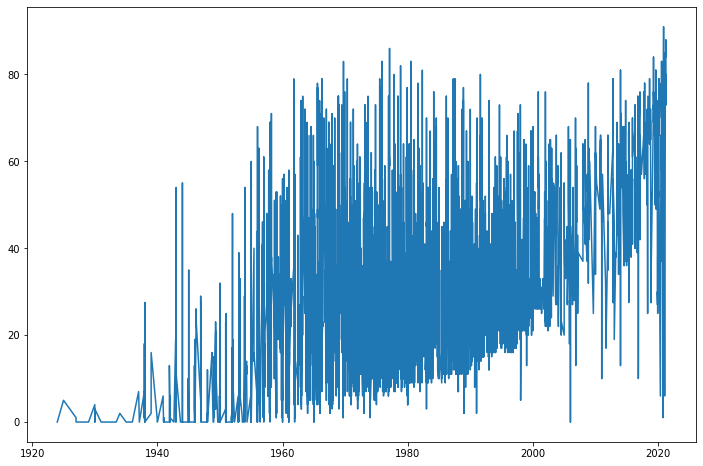

In [41]:
# Matplotlib
fig=plt.figure(figsize=(12,8))
# Error: Se necesita ordenar
# Incuir este comando
df_plot = df_plot.sort_values('new_release_date')
plt.plot(df_plot['new_release_date'],df_plot['popularity'])
plt.show()

<AxesSubplot:xlabel='new_release_date', ylabel='popularity'>

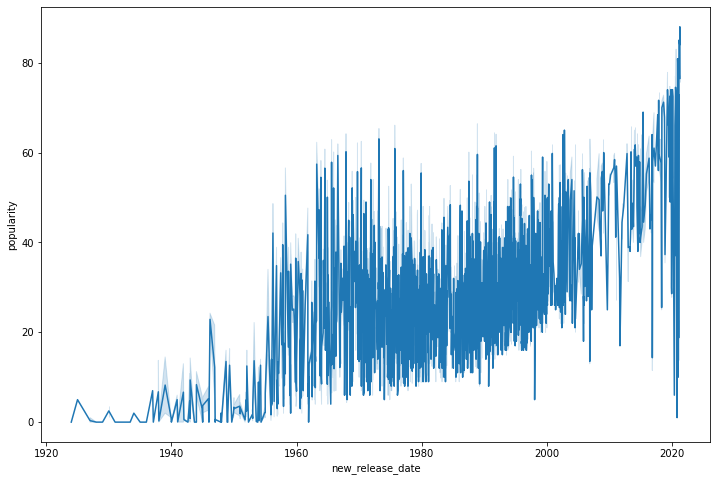

In [42]:
# Seaborn
fig=plt.figure(figsize=(12,8))
sns.lineplot(data = df_plot, x = 'new_release_date', y = 'popularity')

### 1.2 BoxPlots

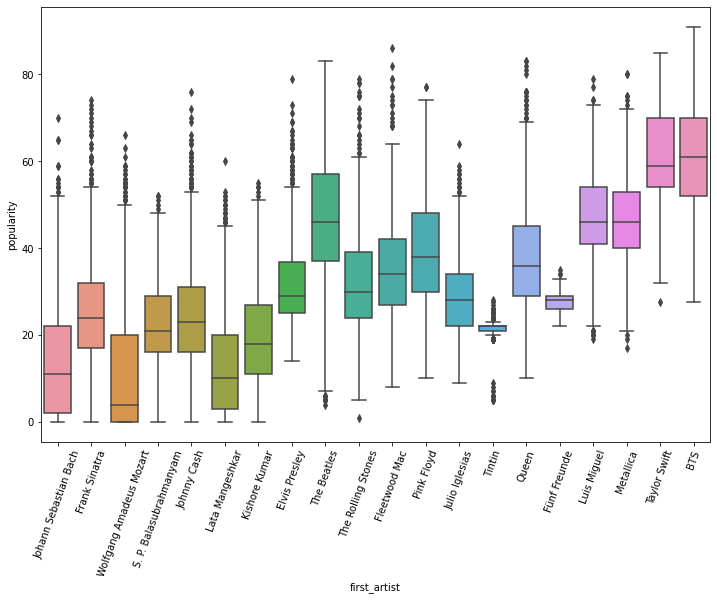

In [43]:
fig=plt.figure(figsize=(12,8))
ax = sns.boxplot(x="first_artist", y="popularity", data=df_plot)
d = ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)

### 1.3 Histogramas

<AxesSubplot:xlabel='danceability', ylabel='Count'>

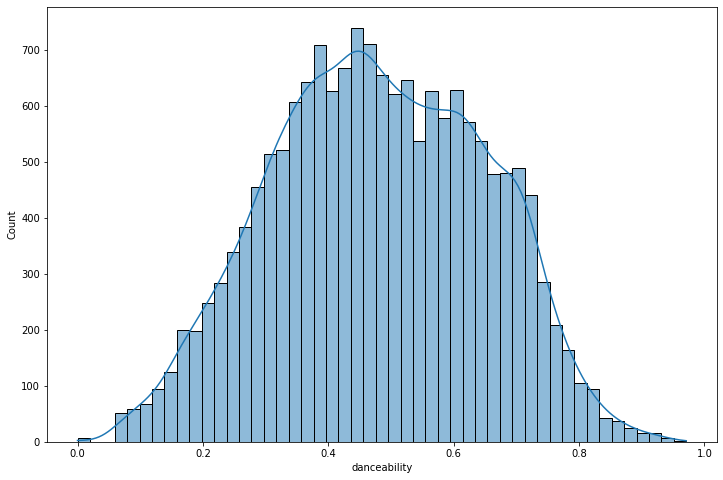

In [44]:
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_plot, x="danceability", kde=True)

### 1.4 ScatterPlots

<AxesSubplot:xlabel='popularity', ylabel='acousticness'>

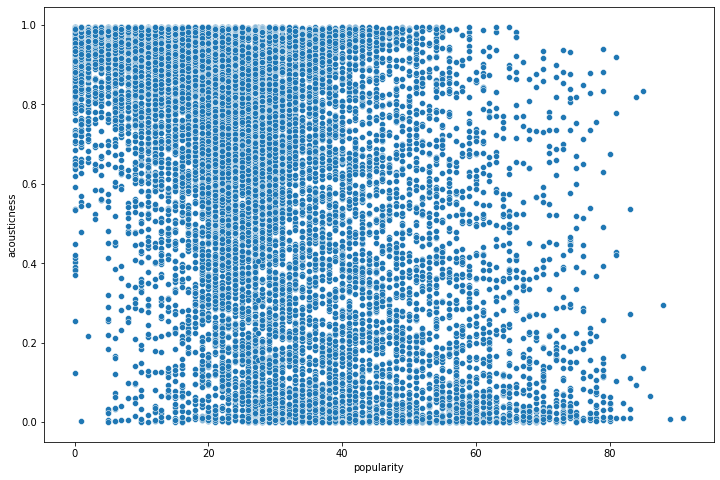

In [45]:
fig=plt.figure(figsize=(12,8))
sns.scatterplot(data=df_plot, x="popularity", y='acousticness')

Al final del dia seaborn esta construido sobre matplotlib, por lo que esta ultima siempre va a ser mas poderosa. Si necesitan algo rápido: seaborn, algo muy especifico: matplotib.

## 2. Reportes Automaticos

Para los reportes automaticos, se puede usar al herramienta de pandas profiling.


Para cada columna, genera las siguientes estadísticas, si son relevantes para el tipo de columna, se presentan en un informe HTML interactivo:

1. Inferencia de tipo: detecta los tipos de columnas en un dataframe.
2. Esenciales: tipo, valores únicos, valores faltantes.
3. Estadísticas de cuantiles como valor mínimo, Q1, mediana, Q3, máximo, rango, rango intercuartílico. Esta opción es bastante útil para identificar datos atípicos.
4. Estadísticas descriptivas como media, moda, desviación estándar, suma, desviación absoluta mediana, coeficiente de variación, curtosis, asimetría.
5. Valores más frecuentes.
6. Histogramas.
7. Correlaciones destacando variables altamente correlacionadas, matrices de Spearman, Pearson y Kendall. Esto permite descubrir relaciones entre atributos.
8. Matriz de valores faltantes, recuento, mapa de calor y dendrograma de valores faltantes

Tomado de la librería oficial de pandas_profiling en [github](https://github.com/pandas-profiling/pandas-profiling)

Lo más importante al utilizar esta librería es recordar que lo fundamental son los análisis que hagamos sobre estos reportes.

In [ ]:
import pandas_profiling

profiling =pandas_profiling.ProfileReport(df_tracks)
profiling

In [ ]:
profiling.to_file("spotify_db_profile.html")